In [1]:
import getpass
import os

from google.colab import userdata


os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get('HIF_TOKN')

In [2]:
!pip install --upgrade --quiet  langchain-huggingface text-generation transformers google-search-results numexpr langchainhub sentencepiece jinja2 bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 551.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [3]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00


In [4]:
from langchain_community.llms import HuggingFaceEndpoint
from langchain_community.chat_models.huggingface import ChatHuggingFace

from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=True,
)

In [5]:
from huggingface_hub import login
login()

In [7]:
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline

llm = HuggingFacePipeline.from_model_id(
    model_id="EpistemeAI/Fireball-Meta-Llama-3.1-8B-Instruct-Agent-0.003",
    task="text-generation",
    pipeline_kwargs=dict(
        max_new_tokens=512,
        do_sample=False,
        repetition_penalty=1.03,
        return_full_text=False,
    ),
    model_kwargs={"quantization_config": quantization_config},
)

chat_model = ChatHuggingFace(llm=llm)

tokenizer_config.json:   0%|          | 0.00/55.3k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00004.bin:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00004.bin:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

pytorch_model-00003-of-00004.bin:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

pytorch_model-00004-of-00004.bin:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

In [8]:
from langchain_core.messages import (
    HumanMessage,
    SystemMessage,
)

messages = [
    SystemMessage(content=
    """
    Environment: ipython. Tools: brave_search, wolfram_alpha. Cutting Knowledge Date: December 2023. Today Date: 24 Auguest 2024\n
    You are a coding assistant with expert with everything\n
    Ensure any code you provide can be executed \n
    with all required imports and variables defined. List the imports.  Structure your answer with a description of the code solution. \n
    write only the code. do not print anything else.\n
    use ipython for search tool. \n
    debug code if erorr occurs. \n
    Here is the user question:
    """
    ),
    HumanMessage(
        content="Solve the differential equation y'' + y = 0, with initial conditions y(0) = 1 and y'(0) = 0."
    ),
]

ai_msg = chat_model.invoke(messages)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:606: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


In [11]:
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 5.5 MB/s eta 0:00:00


In [12]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

In [13]:
python_repl = PythonREPL()

In [14]:
# You can create the tool to pass to an agent
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)

In [15]:
!pip install brave_search

Requested brave_search from https://files.pythonhosted.org/packages/47/22/ae4784787fbb079bbabb5dc87387387c10428c29d8d191b8201dc387890c/brave_search-0.2.0-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    httpx (>=0.24.0,<0.25.0 || >=0.25.2,<0.26.0)
          ~~~~~~~~~~~~~~~~~~^
Please use pip<24.1 if you need to use this version.
  Using cached brave_search-0.2.0-py3-none-any.whl.metadata (5.8 kB)
Requested brave_search from https://files.pythonhosted.org/packages/47/22/ae4784787fbb079bbabb5dc87387387c10428c29d8d191b8201dc387890c/brave_search-0.2.0-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    httpx (>=0.24.0,<0.25.0 || >=0.25.2,<0.26.0)
          ~~~~~~~~~~~~~~~~~~^
Please use pip<24.1 if you need to use this version.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [16]:
print(ai_msg.content)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# define the right-hand side of the differential equation
def deriv(y, t):
    dydt = [y[1], -y[0]]
    return dydt

# initial condition
y0 = [1, 0]

# time points
t = np.linspace(0, 10, 100)

# solve ODE
sol = odeint(deriv, y0, t)

# plot results
plt.plot(t, sol[:, 0], label='y(t)')
plt.plot(t, sol[:, 1], label='y\'(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


<ipython-input-17-4bd2500cb086>:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  repl_tool(ai_msg.content)


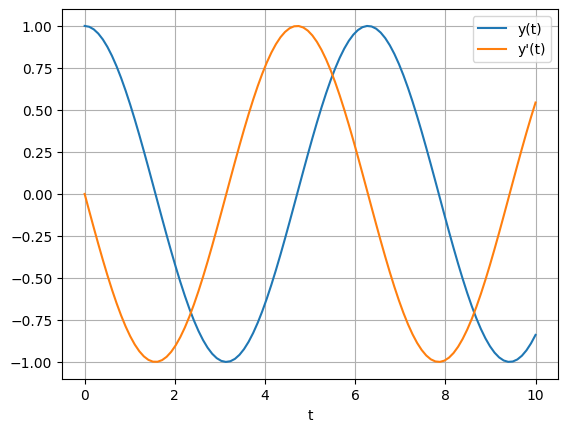

''

In [17]:
repl_tool(ai_msg.content)